# кр

**Бизнес-задача:** Предсказание оттока клиентов банка

**Задача машинного обучения:** Бинарная классификация - предсказание, уйдет ли клиент или нет (1 - ушел, 0 - остался).

https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
lb = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = lb.fit_transform(df[column])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


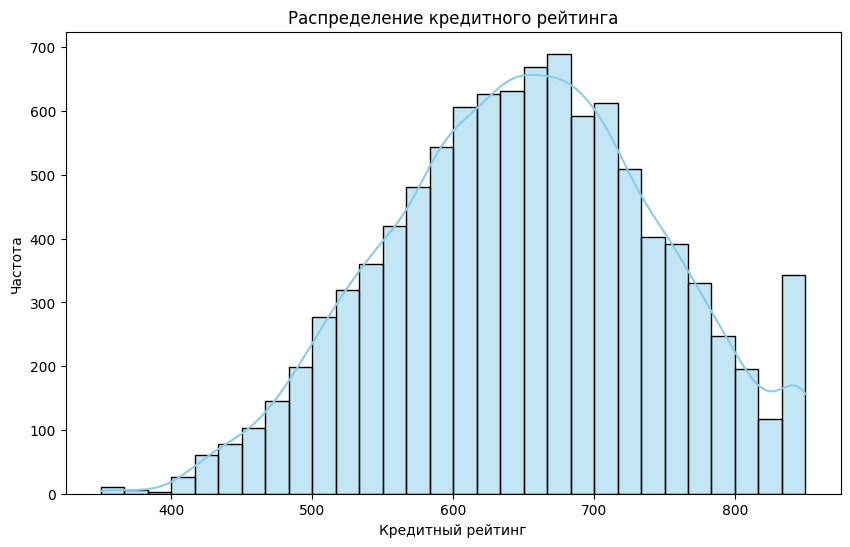

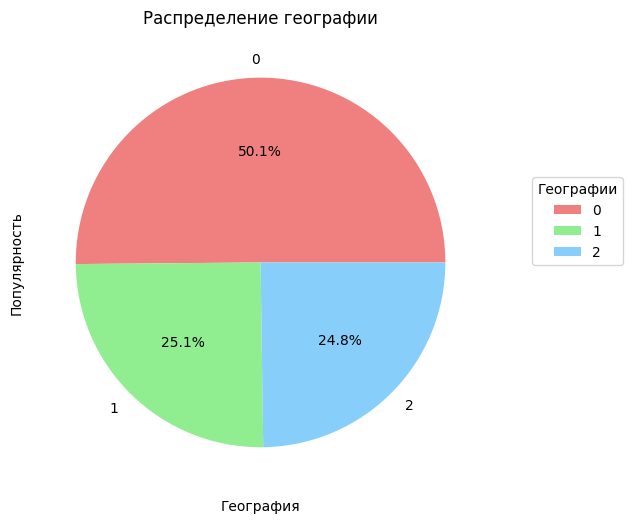

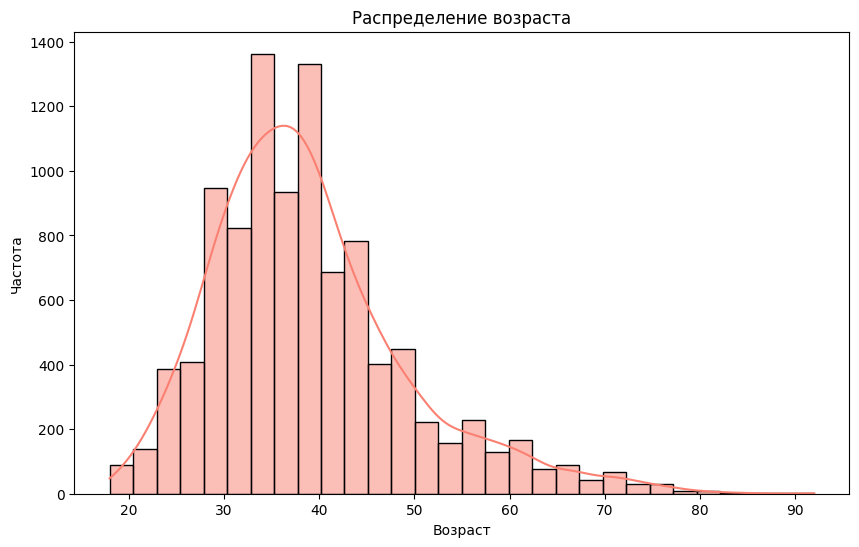

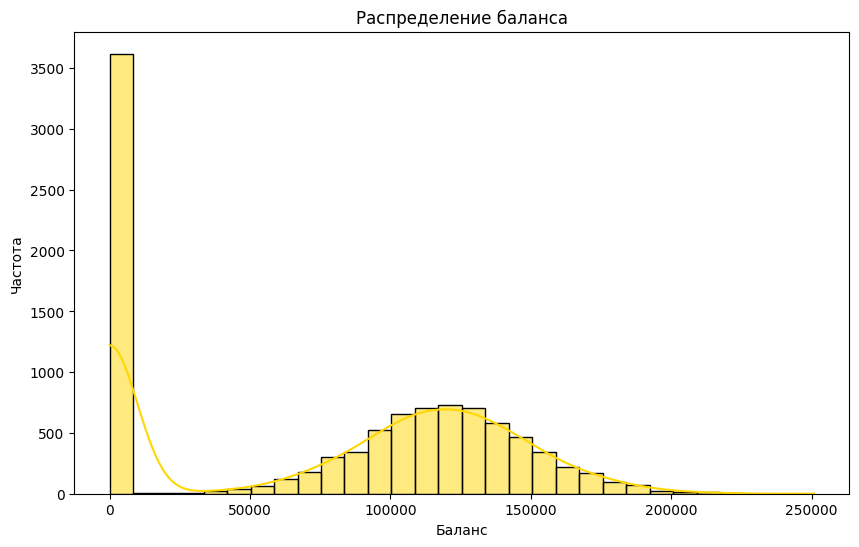

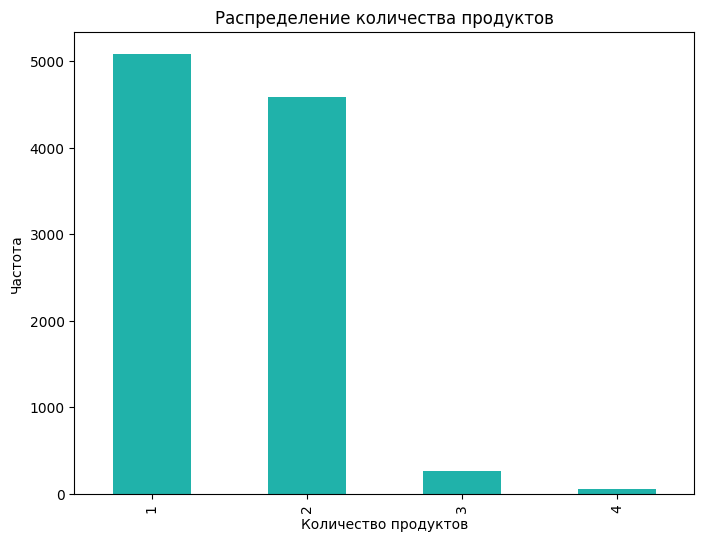

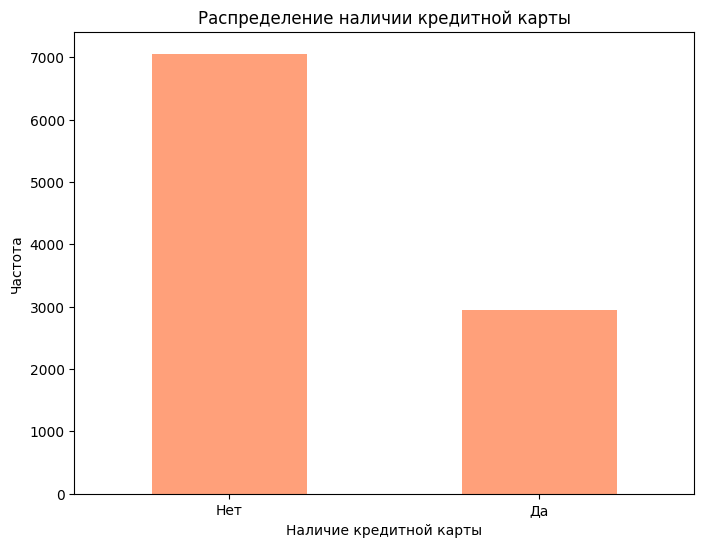

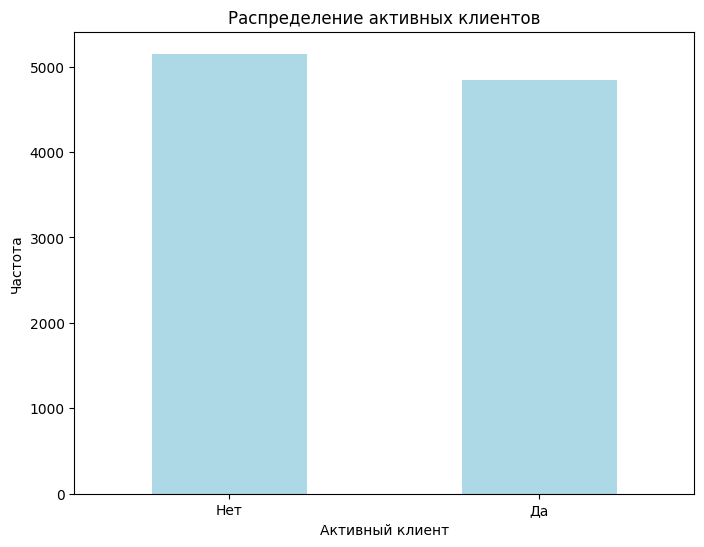

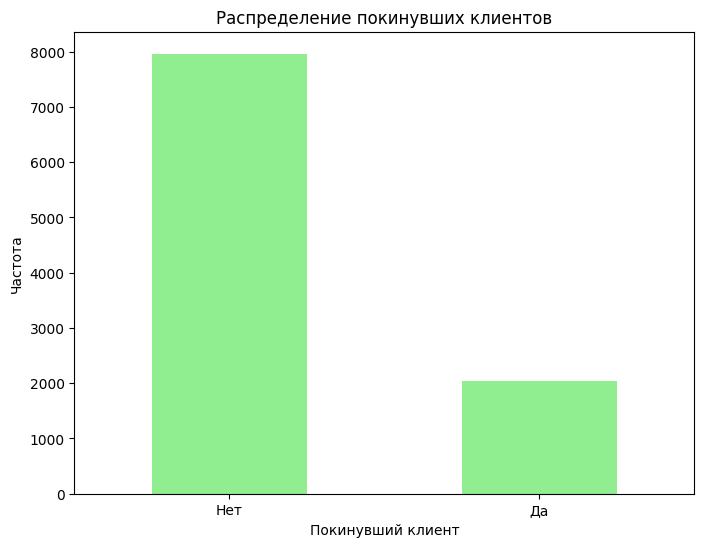

In [ ]:
# Распределение кредитного рейтинга
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CreditScore', bins=30, kde=True, color='skyblue')
plt.title('Распределение кредитного рейтинга')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Частота')
plt.show()

# Распределение географии
plt.figure(figsize=(8, 6))
df['Geography'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Распределение географии')
plt.xlabel('География')
plt.ylabel('Популярность')
plt.legend(loc='best', bbox_to_anchor=(1.3, 0.7), title='Географии')
plt.show()

# Распределение возраста
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='salmon')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

# Распределение баланса
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Balance', bins=30, kde=True, color='gold')
plt.title('Распределение баланса')
plt.xlabel('Баланс')
plt.ylabel('Частота')
plt.show()

# Распределение количества продуктов
plt.figure(figsize=(8, 6))
df['NumOfProducts'].value_counts().plot(kind='bar', color='lightseagreen')
plt.title('Распределение количества продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Частота')
plt.show()

# Распределение наличии кредитной карты
plt.figure(figsize=(8, 6))
df['HasCrCard'].value_counts().plot(kind='bar', color='lightsalmon')
plt.title('Распределение наличии кредитной карты')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Частота')
plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'], rotation=0)
plt.show()

# Распределение активных клиентов
plt.figure(figsize=(8, 6))
df['IsActiveMember'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Распределение активных клиентов')
plt.xlabel('Активный клиент')
plt.ylabel('Частота')
plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'], rotation=0)
plt.show()

# Распределение покинувших клиентов
plt.figure(figsize=(8, 6))
df['Exited'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Распределение покинувших клиентов')
plt.xlabel('Покинувший клиент')
plt.ylabel('Частота')
plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'], rotation=0)
plt.show()

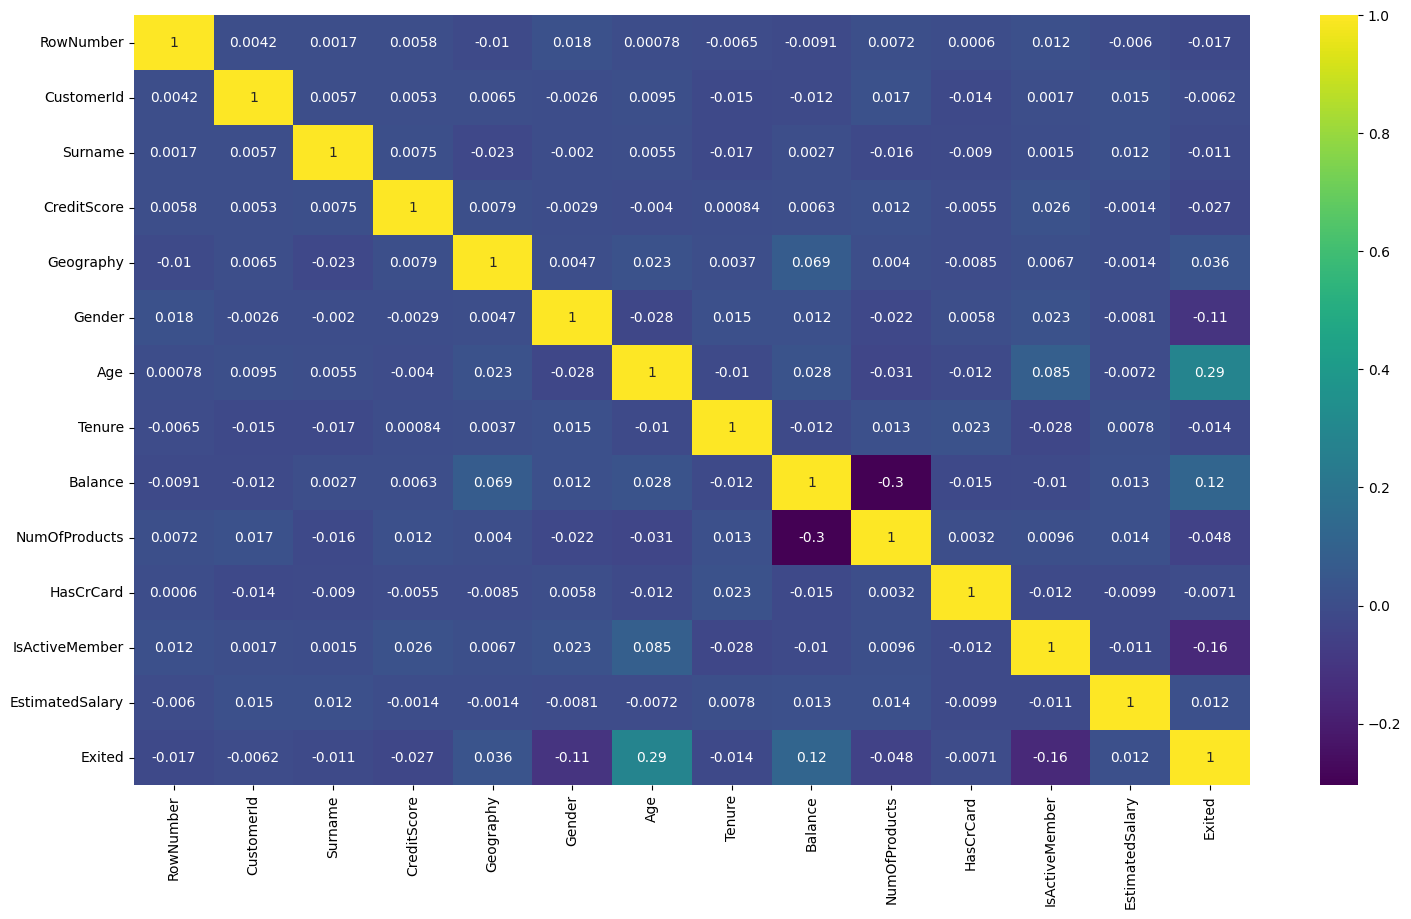

In [ ]:
correlation = df.corr()

palette = sns.color_palette("viridis", as_cmap=True)
plt.figure(figsize=(18,10))
sns.heatmap(correlation,annot=True,cmap= palette)
plt.show()

In [ ]:
X = df.drop(['RowNumber','Exited'],axis=1)
Y = df['Exited']

In [ ]:
# Нормализация
scaled = StandardScaler()
X_scaled = scaled.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y, test_size=0.2,random_state=42)

Model: Logistic Regression, Accuracy: 0.818
Confusion Matrix:
[[1561   46]
 [ 319   74]]


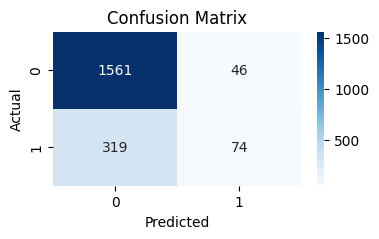


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1607
           1       0.62      0.19      0.29       393

    accuracy                           0.82      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.79      0.82      0.78      2000


Model: Decision Tree, Accuracy: 0.790
Confusion Matrix:
[[1372  235]
 [ 184  209]]


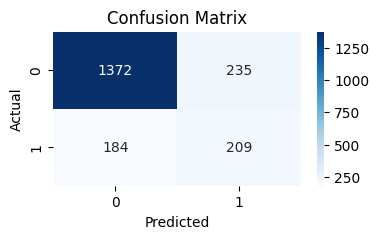


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1607
           1       0.47      0.53      0.50       393

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.79      0.80      2000


Model: Random Forest, Accuracy: 0.864
Confusion Matrix:
[[1551   56]
 [ 217  176]]


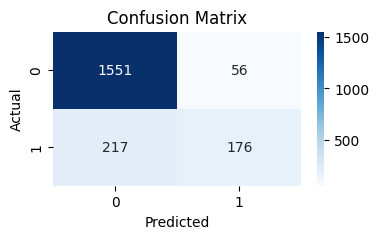


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000


Model: Support Vector Machine, Accuracy: 0.853
Confusion Matrix:
[[1570   37]
 [ 257  136]]


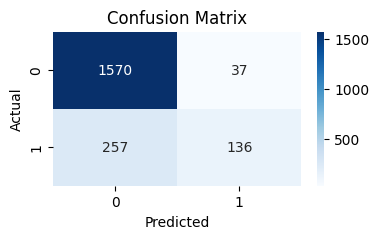


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1607
           1       0.79      0.35      0.48       393

    accuracy                           0.85      2000
   macro avg       0.82      0.66      0.70      2000
weighted avg       0.84      0.85      0.83      2000




In [ ]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

for name, model in models:
    model.fit(X_train, y_train)   # fit_transform - обучает модель на обучающей выборке и преобразует ее в требуемый формат.
    y_pred = model.predict(X_test)  # predict - предсказывает результаты на тестовой выборке.
    accuracy = accuracy_score(y_test, y_pred)   # accuracy_score - вычисляет accuracy модели.
    print(f'Model: {name}, Accuracy: {accuracy:.3f}')

    conf_matrix = confusion_matrix(y_test, y_pred)   # confusion_matrix - вычисляет матрицу конфузии.
    print("Confusion Matrix:")
    print(conf_matrix)
    plt.figure(figsize=(4, 2))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')   # heatmap - отображает матрицу конфузии в виде heatmap.
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print()

    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))   # classification_report - вычисляет отчет о классификации.
    print()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

model = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 5],
    'shrinking': [True, False]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

randomized_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_iter=10)
randomized_search.fit(X_train, y_train)

print("Best parameters: ", randomized_search.best_params_)
print("Best score: ", randomized_search.best_score_)

Best parameters:  {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}
Best score:  0.8539999999999999
Best parameters:  {'shrinking': False, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 1}
Best score:  0.8539999999999999


In [ ]:
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()

# Обучаем ансамблевую модель
voting_clf = VotingClassifier(estimators=[('log_reg', log_reg), ('dec_tree', dec_tree), ('rand_forest', rand_forest)], voting='soft')

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting))
print("Classification Report:")
print(classification_report(y_test, y_pred_voting))

print("F1-score:", f1_score(y_test, y_pred_voting))

print("ROC-AUC score:", roc_auc_score(y_test, y_pred_voting))

precision_recall_curve(y_test, y_pred_voting)

Accuracy: 0.85
Confusion Matrix:
[[1508   99]
 [ 201  192]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.66      0.49      0.56       393

    accuracy                           0.85      2000
   macro avg       0.77      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

F1-score: 0.5614035087719298
ROC-AUC score: 0.7134720711391478


(array([0.1965    , 0.65979381, 1.        ]),
 array([1.        , 0.48854962, 0.        ]),
 array([0, 1]))